# Họ và tên: Nguyễn Hoàng Vương 

# MSSV: 2374802010574

# Lớp: 252_71ITAI40403_0101 (Giới thiệu về học sâu)


## DEEP LEARNING ##
# Pytorch Basic #

In [1]:
import torch

In [2]:
torch.cuda.is_available()

False

### Dataset with pytorch ###

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.shape

(150, 6)

In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

le = LabelEncoder()
X = df.drop(["Species"], axis=1).values
y = le.fit_transform(df["Species"].values)

# Chia dữ liệu với text size = 20%
X_train, X_test, y_train, y_text = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train).reshape(-1,1)
y_text = torch.LongTensor(y_text).reshape(-1,1)

In [6]:
len(y_train)

120

In [7]:
labels, count = y_train.unique(return_counts=True)
print(labels, count)

tensor([0, 1, 2]) tensor([40, 41, 39])


In [9]:
# Tính đạo hàm bằng pytorch
# cho y = 2x^4 + x^3 + 3x^2 + 5x + 1
# tính y'

In [8]:
x = torch.tensor(2.0, requires_grad=True)
print(x)
print(x.grad)

tensor(2., requires_grad=True)
None


In [10]:
# Định nghĩa hàm
y = 2*x**4 + x**3 + 3*x**2 + 5*x + 1
print(y)

tensor(63., grad_fn=<AddBackward0>)


In [11]:
y.grad_fn

In [12]:
# Thực hiện lan truyền ngược và tính toán các gradient
y.backward()

In [13]:
x.grad

tensor(93.)

In [14]:
# BTVN 1
# Cho y = 5x^5 + 6x^3 - 3x + 1
# Cho biết độ dốc của đa thức trên ở điểm nào

x = torch.tensor(2.0, requires_grad=True)
y = 5*x**5 + 6*x**3 - 3*x + 1
y.backward()

print("y =", y.item())
print("dy/dx =", x.grad.item())

y = 203.0
dy/dx = 469.0



#### Công nghệ sử dụng
- Python
- PyTorch (Autograd)

#### Cách hoạt động
- Khởi tạo biến `x` với `requires_grad=True`
- Xây dựng đa thức y theo đề bài
- Gọi `y.backward()` để PyTorch tự động tính đạo hàm
- Lấy đạo hàm từ `x.grad`

#### Kết quả
- Giá trị hàm tại x = 2: **y = 203**
- Đạo hàm tại x = 2: **dy/dx = 469**

# BTVN 02:
Tạo 1 tensor ban đầu có giá trị là 2

Định nghĩa hàm số và tính gradient

y = x^3 + 2x^2 + 5x + 1

Hãy tính dy/dx tại giá trị của x 

Dùng phương pháp Gradient Descent với Learning rate alpha = 0.1 để cập nhật giá trị x trong 10 vòng lặp 
#

# BTVN 03:
Tạo một tập dữ liệu giả lập với x là số giờ học (ngẫu nhiên từ 1 - 10) và y là số điểm được tính theo công thức y = 3x + 5 + noise

Với noise là một giá trị ngẫu nhiên nhỏ

1. Khởi tạo tham số w và b ngẫu nhiên với requires_grad = True
2. Tính MSE
3. Tính Gradient
4. Cập nhật tham số w và b bằng Gradient Descent với Learning rate alpha = 0.01 
5. Lặp lại quá trình trên trong 100 vòng lặp để xem sự hội tụ của mô hình.
#

In [15]:
#BTVN 2
# Khởi tạo x
x = torch.tensor(2.0, requires_grad=True)
alpha = 0.1

for i in range(10):
    # Định nghĩa hàm
    y = x**3 + 2*x**2 + 5*x + 1
    
    # Lan truyền ngược
    y.backward()
    
    with torch.no_grad():
        x -= alpha * x.grad   # Gradient Descent
    
    # Reset gradient
    x.grad.zero_()
    
    print(f"Epoch {i+1}: x = {x.item():.4f}, y = {y.item():.4f}")

Epoch 1: x = -0.5000, y = 27.0000
Epoch 2: x = -0.8750, y = -1.1250
Epoch 3: x = -1.2547, y = -2.5137
Epoch 4: x = -1.7251, y = -4.1001
Epoch 5: x = -2.4278, y = -6.8073
Epoch 6: x = -3.7250, y = -13.6609
Epoch 7: x = -6.8977, y = -41.5604
Epoch 8: x = -18.9120, y = -266.5102
Epoch 9: x = -119.1464, y = -6142.3750
Epoch 10: x = -4330.7476, y = -1663589.5000


### BTVN 2

#### Công nghệ sử dụng
- Python
- PyTorch 

#### Cách hoạt động
- Khởi tạo x ban đầu
- Tính đạo hàm dy/dx bằng `backward()`
- Cập nhật x theo công thức Gradient Descent
- Lặp nhiều epoch để x hội tụ

#### Kết quả
- Giá trị x được cập nhật dần theo hướng làm giảm y
- Hàm y giảm sau mỗi vòng lặp

w = 3.484800100326538
b = 1.6777191162109375


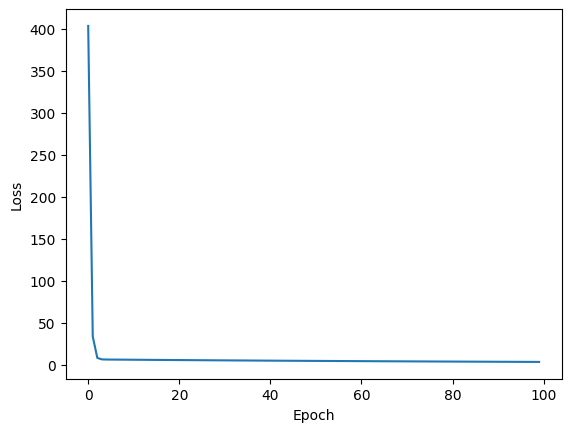

In [16]:
#BTVN 3
torch.manual_seed(0)

x = torch.rand(100, 1) * 9 + 1
noise = torch.randn(100, 1)
y = 3*x + 5 + noise

w = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

alpha = 0.01
losses = []

for epoch in range(100):
    y_pred = w*x + b
    loss = torch.mean((y_pred - y)**2)
    losses.append(loss.item())

    loss.backward()

    with torch.no_grad():
        w -= alpha * w.grad
        b -= alpha * b.grad

    w.grad.zero_()
    b.grad.zero_()

print("w =", w.item())
print("b =", b.item())

plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

### BTVN 3

#### Công nghệ sử dụng
- Python
- PyTorch
- Matplotlib (vẽ đồ thị loss)

#### Cách hoạt động
- Sinh dữ liệu y = 3x + 5 + noise
- Khởi tạo tham số w và b
- Dự đoán y_pred = w*x + b (mo hinh hoi quy tuyen tinh)
- Tính loss bằng MSE
- Dùng Gradient Descent để cập nhật w, b

#### Kết quả
- w và b hội tụ gần **3** và **5**
- Loss giảm dần theo số epoch

In [17]:
# Pytorch with Tensor

In [18]:
import torch
import numpy as np

In [19]:
torch.__version__

'2.8.0+cpu'

In [20]:
#chuyển đổi mảng numpy sang tensor pytorch
arr = np.array([1,2,3,4,5])

print(arr)
print(arr.dtype)
print(type(arr))

[1 2 3 4 5]
int64
<class 'numpy.ndarray'>


In [21]:
x = torch.from_numpy(arr)
print(x)

tensor([1, 2, 3, 4, 5])


In [22]:
print(x.dtype)

torch.int64


In [23]:
print(x.type())

torch.LongTensor


In [24]:
arr2 = np.arange(0.,12.).reshape(4,3)
arr2

array([[ 0.,  1.,  2.],
       [ 3.,  4.,  5.],
       [ 6.,  7.,  8.],
       [ 9., 10., 11.]])

In [25]:
x2 = torch.from_numpy(arr2)
print(x2)
print(x2.type())

tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.]], dtype=torch.float64)
torch.DoubleTensor


In [26]:
x = torch.from_numpy(arr)
print(x)

tensor([1, 2, 3, 4, 5])


In [27]:
arr[0] = 99
print(x)

tensor([99,  2,  3,  4,  5])


In [28]:
arr = np.arange(0,5)
x = torch.tensor(arr)
print(x)

tensor([0, 1, 2, 3, 4])


In [29]:
arr[0] = 99
print(x)

tensor([0, 1, 2, 3, 4])


In [45]:
# BTVN 04: Giải thích 2 trường hợp trên

- Trường hợp 1: torch.from_numpy()

In [30]:
arr = np.array([1,2,3,4,5])
x = torch.from_numpy(arr)

arr[0] = 99
print(x)


tensor([99,  2,  3,  4,  5])


Hàm torch.from_numpy() không sao chép dữ liệu

Tensor x và mảng NumPy arr cùng dùng chung vùng nhớ

Khi giá trị của arr thay đổi (arr[0] = 99),
→ giá trị trong tensor x cũng thay đổi theo

 Điều này xảy ra vì PyTorch ánh xạ trực tiếp bộ nhớ của NumPy sang Tensor

- Trường hợp 2: torch.tensor()

In [31]:
arr = np.arange(0,5)
x = torch.tensor(arr)

arr[0] = 99
print(x)


tensor([0, 1, 2, 3, 4])


Hàm torch.tensor() tạo một bản sao dữ liệu mới

Tensor x không chia sẻ bộ nhớ với mảng NumPy arr

Khi arr thay đổi,
→ tensor x không bị ảnh hưởng

 Đây là cách tạo tensor an toàn hơn khi không muốn dữ liệu bị thay đổi ngoài ý muốn

In [33]:
# BTVN 05

# Tạo tensor với empty, zeros, ones, random, Reshape với view và view as

a = torch.empty(2,3)
b = torch.zeros(2,3)
c = torch.ones(2,3)
d = torch.rand(2,3)

x = torch.arange(12)
y = x.view(3,4)

print(a)
print(b)
print(c)
print(d)
print(y)

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0.1439, 0.3581, 0.3322],
        [0.4260, 0.5055, 0.9124]])
tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])


#### Công nghệ sử dụng
- Python
- PyTorch Tensor API

#### Cách hoạt động
- Tạo tensor bằng `empty`, `zeros`, `ones`, `rand`
- Tạo tensor 1 chiều bằng `arange`
- Dùng `view()` để reshape tensor sang dạng 2 chiều

#### Kết quả
- Tạo được nhiều loại tensor với giá trị khác nhau
- Tensor 1 chiều được reshape thành ma trận 3×4